In [1]:
import geopandas as gpd
from shapely.geometry import Point
from shapely.ops import unary_union
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# importing dataset

file_path = '/Users/stefaniadaskalaki/pCloud Drive/02.Business/Cambodia/Data/new/cambodia-us-bombing-1965-1975 TABLEAU.xlsx'
sheet_name = "cambodia_us_bombing_1965-1975"
data = pd.read_excel(file_path, sheet_name=sheet_name)

In [3]:
# checking data

data.head()

,OBJECTID,ORDNANCE_1,DATE,LAT,LON,NUM_ACRFT,AIRCRAFT,LOAD_QTY,LOAD_LBS,ORDNANCE,ORD_CLASS,CATEGORY,TARGET,BDA,LATLONKEY,Xcamb,Ycamb,Xbomb,Ybomb
0,1,928423,1970-05-04,14.68601,107.53532,2,F-100 D,6,50,20MM M39 (In Hundreds),M-39,Ammunition,Area/Depot,ONTGT/NO BDA,266088,"0.3235990489300462,",0.540957,0.537524,0.332340
1,2,928424,1970-05-04,14.68601,107.53532,2,F-100 D,8,799,750 LB General Purpose Bomb,750LB GP M-117,General_Purpose,Area/Depot,ONTGT/NO BDA,266088,"-0.5130471780753347,",0.647438,-0.630445,0.517092
2,3,928425,1970-05-04,14.68601,107.53532,2,F-100 D,8,799,750 LB General Purpose Bomb,750LB GP M-117,General_Purpose,Command Post,ONTGT/NO BDA,266088,"-0.18527343261168816,",-0.095288,-0.931226,0.294116
3,4,1265223,1970-05-04,14.68484,107.53496,2,F100,8,32832,M117 GP Bomb 18 Fuse,750LB GP/M-117,General_Purpose,Command Post Area,Target,266006,"0.0003153547741208129,",-0.618012,-0.144116,-0.871729
4,5,1265222,1970-05-04,14.68484,107.53496,2,F4,4,46032,MK84 GP Bomb,2000LB MK-84,General_Purpose,No target,Not available,266006,"0.01677887623576524,",-0.778173,0.346118,0.107241


In [4]:
# extracting year from DATE in order to use for Tableau filtering

data['YEAR'] = pd.to_datetime(data['DATE']).dt.year

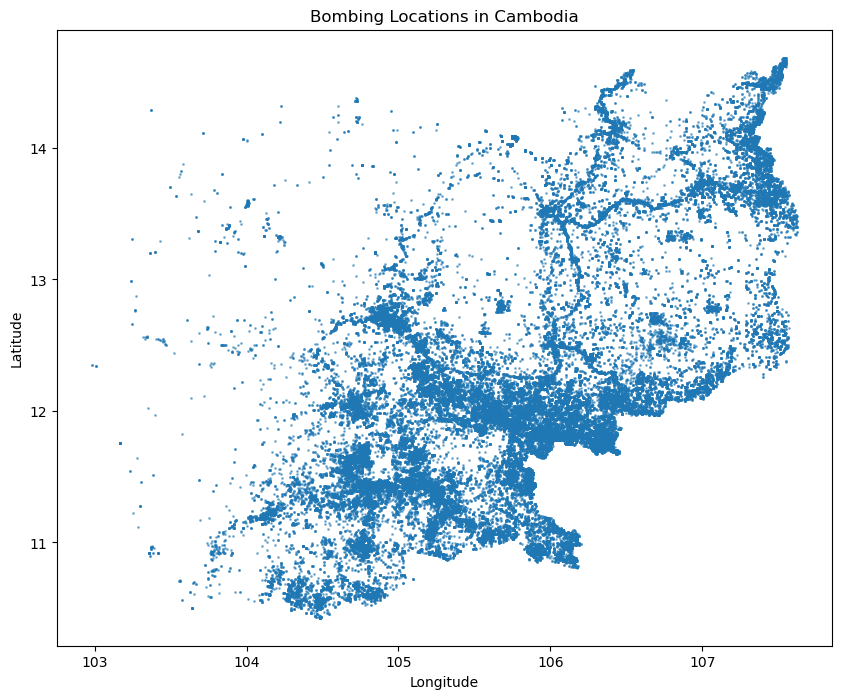

In [5]:
# plotting LAT and LON

plt.figure(figsize=(10, 8))
plt.scatter(data['LON'], data['LAT'], s=1, alpha=0.5)
plt.title("Bombing Locations in Cambodia")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

 # Converting bombing data to GeoDataFrame

In [6]:
# creating a GeoDataFrame for bombing data

gdf = gpd.GeoDataFrame(
    data,
    geometry=gpd.points_from_xy(data['LON'], data['LAT']),
    crs="EPSG:4326"  # WGS84 is the standard latitude/longitude system, suitable for geographic data
)

In [7]:
# checking GeoDataFrame structure

print(gdf.head(20))

    OBJECTID  ORDNANCE_1       DATE       LAT        LON  NUM_ACRFT  AIRCRAFT  \
0          1      928423 1970-05-04  14.68601  107.53532          2  F-100  D   
1          2      928424 1970-05-04  14.68601  107.53532          2  F-100  D   
2          3      928425 1970-05-04  14.68601  107.53532          2  F-100  D   
3          4     1265223 1970-05-04  14.68484  107.53496          2      F100   
4          5     1265222 1970-05-04  14.68484  107.53496          2        F4   
5          6     1265215 1970-05-04  14.68484  107.53496          2      F100   
6          7     1265214 1970-05-04  14.68484  107.53496          2      F100   
7          8     1265221 1970-05-04  14.68484  107.53496          2        F4   
8          9     1265218 1970-05-04  14.68484  107.53496          2        F4   
9         10     1265220 1970-05-04  14.68484  107.53496          2      F100   
10        11     1265219 1970-05-04  14.68484  107.53496          2        F4   
11        12     1265217 197

# Importing administrative boundaries and aligning with CRS 
(ensuring all spatial data layers are using the same spatial reference system)

In [8]:
# loading Cambodia's administrative boundaries

admin_boundaries_path = '/Users/stefaniadaskalaki/pCloud Drive/02.Business/Cambodia/Data/original/gadm41_KHM_2.json'
admin_boundaries = gpd.read_file(admin_boundaries_path)

In [9]:
# checking the CRS of both datasets

print("Bombing data CRS:", gdf.crs)
print("Admin boundaries CRS:", admin_boundaries.crs)

Bombing data CRS: EPSG:4326
Admin boundaries CRS: EPSG:4326


In [10]:
# ensuring both datasets have the same CRS once again

gdf = gdf.to_crs(admin_boundaries.crs)

In [11]:
# previewing the administrative boundaries

print(admin_boundaries.head())

       GID_2 GID_0   COUNTRY    GID_1           NAME_1 NL_NAME_1  \
0  KHM.1.1_2   KHM  Cambodia  KHM.1_1  BântéayMéanchey        NA   
1  KHM.1.2_2   KHM  Cambodia  KHM.1_1  BântéayMéanchey        NA   
2  KHM.1.3_2   KHM  Cambodia  KHM.1_1  BântéayMéanchey        NA   
3  KHM.1.4_2   KHM  Cambodia  KHM.1_1  BântéayMéanchey        NA   
4  KHM.1.5_2   KHM  Cambodia  KHM.1_1  BântéayMéanchey        NA   

         NAME_2 VARNAME_2 NL_NAME_2 TYPE_2 ENGTYPE_2 CC_2 HASC_2  \
0         Malai        NA        NA   Srok  District   NA     NA   
1  MongkolBorei        NA        NA   Srok  District   NA     NA   
2       OuChrov        NA        NA   Srok  District   NA     NA   
3      PaoyPaet        NA        NA   Srok  District   NA     NA   
4     PhnumSrok        NA        NA   Srok  District   NA     NA   

                                            geometry  
0  MULTIPOLYGON (((102.6339 13.5608, 102.64 13.56...  
1  MULTIPOLYGON (((103.1478 13.4119, 103.1242 13....  
2  MULTIPOLYGON (

# Using spatial join to assign bombing points to districts

In [12]:
# performing a spatial join to assign each bombing point to a district

joined = gpd.sjoin(gdf, admin_boundaries, how='inner', predicate='intersects')

In [13]:
# checking the result

print(joined.head(20))

    OBJECTID  ORDNANCE_1       DATE       LAT        LON  NUM_ACRFT  AIRCRAFT  \
0          1      928423 1970-05-04  14.68601  107.53532          2  F-100  D   
1          2      928424 1970-05-04  14.68601  107.53532          2  F-100  D   
2          3      928425 1970-05-04  14.68601  107.53532          2  F-100  D   
3          4     1265223 1970-05-04  14.68484  107.53496          2      F100   
4          5     1265222 1970-05-04  14.68484  107.53496          2        F4   
5          6     1265215 1970-05-04  14.68484  107.53496          2      F100   
6          7     1265214 1970-05-04  14.68484  107.53496          2      F100   
7          8     1265221 1970-05-04  14.68484  107.53496          2        F4   
8          9     1265218 1970-05-04  14.68484  107.53496          2        F4   
9         10     1265220 1970-05-04  14.68484  107.53496          2      F100   
10        11     1265219 1970-05-04  14.68484  107.53496          2        F4   
11        12     1265217 197

In [14]:
joined.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 115239 entries, 0 to 115272
Data columns (total 35 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   OBJECTID     115239 non-null  int64         
 1   ORDNANCE_1   115239 non-null  int64         
 2   DATE         115239 non-null  datetime64[ns]
 3   LAT          115239 non-null  float64       
 4   LON          115239 non-null  float64       
 5   NUM_ACRFT    115239 non-null  int64         
 6   AIRCRAFT     115239 non-null  object        
 7   LOAD_QTY     115239 non-null  int64         
 8   LOAD_LBS     115239 non-null  int64         
 9   ORDNANCE     115239 non-null  object        
 10  ORD_CLASS    115239 non-null  object        
 11  CATEGORY     115239 non-null  object        
 12  TARGET       115239 non-null  object        
 13  BDA          115239 non-null  object        
 14  LATLONKEY    115239 non-null  int64         
 15  Xcamb        115239 non-nu

In [15]:
# Selecting only the required columns from the joined dataset for my main dataset to use in Tableau

main_dataset = joined[[
    'OBJECTID', 'ORDNANCE_1', 'DATE', 'LAT', 'LON', 'NUM_ACRFT', 'AIRCRAFT',
    'LOAD_QTY', 'LOAD_LBS', 'ORDNANCE', 'ORD_CLASS', 'CATEGORY', 'TARGET',
    'BDA', 'LATLONKEY', 'Xbomb', 'Ybomb', 'YEAR', 'NAME_1', 'NAME_2'
]]


In [16]:
# renaming columns for main dataset

main_dataset = joined.rename(columns={'NAME_1': 'Province', 'NAME_2': 'District'})


In [17]:
# checking outcome

print(main_dataset.head())

   OBJECTID  ORDNANCE_1       DATE       LAT        LON  NUM_ACRFT  AIRCRAFT  \
0         1      928423 1970-05-04  14.68601  107.53532          2  F-100  D   
1         2      928424 1970-05-04  14.68601  107.53532          2  F-100  D   
2         3      928425 1970-05-04  14.68601  107.53532          2  F-100  D   
3         4     1265223 1970-05-04  14.68484  107.53496          2      F100   
4         5     1265222 1970-05-04  14.68484  107.53496          2        F4   

   LOAD_QTY  LOAD_LBS                     ORDNANCE  ...     GID_1    Province  \
0         6        50       20MM M39 (In Hundreds)  ...  KHM.20_1  Rôtânôkiri   
1         8       799  750 LB General Purpose Bomb  ...  KHM.20_1  Rôtânôkiri   
2         8       799  750 LB General Purpose Bomb  ...  KHM.20_1  Rôtânôkiri   
3         8     32832         M117 GP Bomb 18 Fuse  ...  KHM.20_1  Rôtânôkiri   
4         4     46032                 MK84 GP Bomb  ...  KHM.20_1  Rôtânôkiri   

  NL_NAME_1  District  VARNAME_2

In [18]:
# defining path

output_path = '/Users/stefaniadaskalaki/pCloud Drive/02.Business/Cambodia/Data/new/cambodia_bombing_province_dataset.xlsx'

In [19]:
# Saving the final dataset as the new main dataset

main_dataset.to_excel(output_path, index=False)
print(f"Final dataset with administrative boundaries saved to: {output_path}")

Final dataset with administrative boundaries saved to: /Users/stefaniadaskalaki/pCloud Drive/02.Business/Cambodia/Data/new/cambodia_bombing_province_dataset.xlsx


In [20]:
# keeping only relevant columns and ensuring joined remains a GeoDataFrame

joined = gpd.GeoDataFrame(
    joined[[
        'OBJECTID', 'YEAR', 'LOAD_LBS', 'ORDNANCE', 'NAME_1', 'NAME_2', 'geometry'
    ]],
    geometry='geometry',
    crs="EPSG:4326"
)

In [21]:
# renaming columns

joined = joined.rename(columns={'NAME_1': 'Province', 'NAME_2': 'District'})

# Aggregating bombing data by province and district

In [22]:
# aggregating by Province , District and Year

bombing_summary = joined.groupby(['Province', 'District', 'YEAR']).agg(
    total_load_lbs=('LOAD_LBS', 'sum'),   # Total bomb weight
    total_bombings=('OBJECTID', 'count') # Total number of bombing records
).reset_index()

In [23]:
# Checking the summary
print(bombing_summary.head(10))

     Province      District  YEAR  total_load_lbs  total_bombings
0  Batdâmbâng      AekPhnum  1970               6               1
1  Batdâmbâng     KoasKrala  1970             264               1
2  Batdâmbâng     KoasKrala  1973          284122               6
3  Batdâmbâng  MoungRuessei  1973          186352               3
4  Batdâmbâng      RukhKiri  1973         1477112               4
5  Batdâmbâng       Sangkae  1973          150340              11
6  Batdâmbâng      ThmaKoul  1970             270               2
7    KaôhKong    BotumSakor  1970           42480               1
8    KaôhKong    BotumSakor  1973         7398036              37
9    KaôhKong      KaohKong  1971           57640               2


In [24]:
# defining output path

output_path_1 = '/Users/stefaniadaskalaki/pCloud Drive/02.Business/Cambodia/Data/new/top_bombed_provinces_yearly.xlsx'

In [25]:
# exporting aggregated data for Tableau

bombing_summary.to_excel(output_path_1, index=False)
print(f"Yearly bombed province data saved to: {output_path_1}")

Yearly bombed province data saved to: /Users/stefaniadaskalaki/pCloud Drive/02.Business/Cambodia/Data/new/top_bombed_provinces_yearly.xlsx


# Calculating total bombed area

In [26]:
# ensuring both are in the same projected CRS (UTM Zone 48N)

admin_boundaries = admin_boundaries.to_crs(epsg=32648)
joined = joined.to_crs(epsg=32648)

In [27]:
# defining buffer radii for each bomb type

bomb_buffers = {
    '20MM M39 (In Hundreds)': 100,  # Small ammunition
    '750 LB General Purpose Bomb': 500,  # Medium-size bomb
    '2000LB MK-84': 1000,  # Large bomb
    'Cluster Bomb': 700,  # Cluster ordnance
}

A buffer is a zone created around a bombing point. Buffers are commonly used for spatial analysis, such as determining the area affected by an event (e.g., a bombing, noise pollution, or flood). By creating a buffer around each bombing point, you simulate the physical area potentially affected by the bombing.

In [28]:
# assigning buffer radius based on ORDNANCE type

joined['buffer_radius'] = joined['ORDNANCE'].map(bomb_buffers).fillna(500)  # Default radius = 500m

In [29]:
# generating a buffered geometry for each point using the assigned radii

joined['buffered_geometry'] = joined.apply(
    lambda row: row['geometry'].buffer(row['buffer_radius']),
    axis=1
)

In [30]:
# merging all the buffered geometries to create a single geometry representing the total bombed area

combined_buffers = unary_union(joined['buffered_geometry'])

In [31]:
# calculating bombed area for each district by performing spatial intersection between the combined buffers and the administrative boundaries

bombed_area_by_admin = gpd.overlay(
    admin_boundaries,
    gpd.GeoDataFrame({'geometry': [combined_buffers]}, crs="EPSG:32648"),
    how='intersection'
)

In [32]:
# calculating total bombed area directly from combined_buffers

total_bombed_area_km2 = combined_buffers.area / 1e6  # Convert m² to km²
print(f"Total Bombed Area: {total_bombed_area_km2:.2f} km²")

Total Bombed Area: 18314.08 km²


# Determining bombed area by administrative boundaries

by performing a spatial intersection between the combined buffers and the administrative boundaries

In [33]:
# calculating bombed area for each administrative unit

bombed_area_by_admin['area_km2'] = bombed_area_by_admin['geometry'].area / 1e6 # converting m2 to km2

In [34]:
# aggregtating bombed area by province and district

bombed_area_summary = bombed_area_by_admin.groupby(['NAME_1', 'NAME_2']).agg({'area_km2': 'sum'}).reset_index()

In [35]:
# merging with administrative areas to calculate bombed area percentage

admin_boundaries['total_area_km2'] = admin_boundaries['geometry'].area / 1e6
final_summary = admin_boundaries[['NAME_1', 'NAME_2', 'total_area_km2']].merge(
    bombed_area_summary, on=['NAME_1', 'NAME_2'], how='left'
)


In [36]:
# Fill NaN values

final_summary['area_km2'] = final_summary['area_km2'].fillna(0)
final_summary['bombed_area_percentage'] = (final_summary['area_km2'] / final_summary['total_area_km2']) * 100

In [37]:
# defining output path

output_path_2 = '/Users/stefaniadaskalaki/pCloud Drive/02.Business/Cambodia/Data/new/bombed_area_summary.xlsx'

In [38]:
# exporting bombed area summary for Tableau

final_summary.to_excel(output_path_2, index=False)
print(f"Bombed area summary saved to: {output_path_2}")

Bombed area summary saved to: /Users/stefaniadaskalaki/pCloud Drive/02.Business/Cambodia/Data/new/bombed_area_summary.xlsx


# Merging bombed area data with administrative boundaries for mapping

In [39]:
# aggregating data at the province level

province_summary = final_summary.groupby('NAME_1').agg(
    total_area_km2=('total_area_km2', 'sum'),
    total_bombed_area_km2=('area_km2', 'sum'),
    avg_bombed_area_percentage=('bombed_area_percentage', 'mean')
).reset_index()

In [40]:
# merging with administrative boundaries for mapping

province_map = admin_boundaries[['NAME_1', 'geometry']].drop_duplicates().merge(
    province_summary, on='NAME_1', how='left'
)

In [41]:
# filling missing values

province_map['total_bombed_area_km2'] = province_map['total_bombed_area_km2'].fillna(0)
province_map['avg_bombed_area_percentage'] = province_map['avg_bombed_area_percentage'].fillna(0)

In [42]:
# defining output path

output_path_3 = '/Users/stefaniadaskalaki/pCloud Drive/02.Business/Cambodia/Data/new/cambodia_province_map.geojson'

In [43]:
# saving to GeoJSON

province_map.to_file(output_path_3, driver='GeoJSON')
print(f"Province-level map data saved to: {output_path_3}")

Province-level map data saved to: /Users/stefaniadaskalaki/pCloud Drive/02.Business/Cambodia/Data/new/cambodia_province_map.geojson
